<a href="https://colab.research.google.com/github/YMGYM/google_colab_files/blob/master/NLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

이 노트북은 Made With ML의 교육 파일 https://github.com/madewithml/basics/blob/master/notebooks/14_Embeddings/14_TF_Embeddings.ipynb 을 연습한 노트북입니다.

This notebook is for practice of https://github.com/madewithml/basics/blob/master/notebooks/14_Embeddings/14_TF_Embeddings.ipynb in Made With ML

# Data

## Load data


In [0]:
import urllib

In [0]:
DATA_FILE = 'harrypotter.txt'

In [0]:
# github repository 에서 데이터를 읽어 옴
url = "https://raw.githubusercontent.com/madewithml/basics/master/data/harrypotter.txt"
response = urllib.request.urlopen(url)
html = response.read()
with open(DATA_FILE, 'wb') as fp:
  fp.write(html) # 파일로 생성

## Preprocess

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
import nltk; nltk.download('punkt')

from tensorflow.keras.preprocessing.text import text_to_word_sequence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


nltk.punkt 는 자연어 토큰화 모듈.
토큰화에 대한 자세한 설명은 [여기](https://wikidocs.net/21698)를 참조.
요약하면 주어진 corpus를 사용하기 쉽게 정제하는 것.
`tf.keras.preprocessing.text.text_to_word_sequence` 는 문장을 단어의 연속으로 바꿔 줌. 


In [0]:
SEED = 1234

In [0]:
tf.random.set_seed(SEED)

In [0]:
FILTERS = "!\"'#$%&()*+,_./:;<=>?@[\\]^_'{|}~"
LOWER = True

In [0]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
with open(DATA_FILE, encoding='cp1252') as fp:
  book = fp.read()
sentences = tokenizer.tokenize(book)
print(f"{len(sentences)} sentences")

15640 sentences


In [0]:
print (sentences[12])
sentences = [text_to_word_sequence(text=sentence,filters=FILTERS,lower=LOWER, split=" ") for sentence in sentences]
print(sentences[12])

They turned right, into a wide driveway that led off the lane.
['they', 'turned', 'right', 'into', 'a', 'wide', 'driveway', 'that', 'led', 'off', 'the', 'lane']


`' '` 을 기점으로 단어를 잘라 리스트로 변환함</br>
`lower` 옵션으로 소문자화 설정.

# Word2Vec

In [0]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [0]:
EMBEDDING_DIM = 100 # embedding 벡터
WINDOW = 5
MIN_COUNT = 3 # 3회 이하로 나온 단어는 무시
SKIP_GRAM = 1 # 0 = CBOW
NEGATIVE_SAMPLING = 20

In [8]:
w2v = Word2Vec(sentences=sentences,size = EMBEDDING_DIM, window=WINDOW, min_count = MIN_COUNT, sg = SKIP_GRAM, negative=NEGATIVE_SAMPLING)


NameError: ignored

In [9]:
print(w2v)

NameError: ignored

In [0]:
w2v.wv.get_vector("potter")

In [0]:
w2v.wv.most_similar(positive="scar", topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pain', 0.9584817886352539),
 ('forehead', 0.9346109628677368),
 ('burning', 0.9248462915420532),
 ('cold', 0.924383282661438),
 ('burned', 0.921999454498291)]

In [0]:
w2v.wv.save_word2vec_format('model.bin', binary=True)
w2v = KeyedVectors.load_word2vec_format('model.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Pretrained embeddings

In [0]:
from gensim.scripts.glove2word2vec import glove2word2vec
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from urllib.request import urlopen
from zipfile import ZipFile

In [0]:
np.random.seed(SEED)

In [0]:
EMBEDDING_DIM = 100

In [0]:
def plot_embeddings(words, embeddings, pca_results):
  for word in words:
    index = embeddings.index2word.index(word)
    plt.scatter(pca_results[index, 0], pca_results[index, 1])
    plt.annotate(word, xy=(pca_results[index, 0], pca_results[index, 1]))
  plt.show()

In [15]:
resp = urlopen('http://nlp.stanford.edu/data/glove.6B.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

KeyboardInterrupt: ignored

In [16]:
embeddings_file = f"glove.6B.{EMBEDDING_DIM}d.txt"
zipfile.extract(embeddings_file)

'/content/glove.6B.100d.txt'

In [17]:
with open(embeddings_file, 'r') as fp:
  for i in range(1,80):
    line = next(fp)
    values = line.split()
    word = values[0]
    embedding = np.asarray(values[1:], dtype='float32')
    print(f"word : {word}")
    # print(f"embedding: \n{embedding}")
    # print(f"embedding dim: {len(embedding)}")
    

word : the
word : ,
word : .
word : of
word : to
word : and
word : in
word : a
word : "
word : 's
word : for
word : -
word : that
word : on
word : is
word : was
word : said
word : with
word : he
word : as
word : it
word : by
word : at
word : (
word : )
word : from
word : his
word : ''
word : ``
word : an
word : be
word : has
word : are
word : have
word : but
word : were
word : not
word : this
word : who
word : they
word : had
word : i
word : which
word : will
word : their
word : :
word : or
word : its
word : one
word : after
word : new
word : been
word : also
word : we
word : would
word : two
word : more
word : '
word : first
word : about
word : up
word : when
word : year
word : there
word : all
word : --
word : out
word : she
word : other
word : people
word : n't
word : her
word : percent
word : than
word : over
word : into
word : last
word : some
word : government


In [18]:
# local 디렉토리에 저장
word2vec_output_file = f"{embeddings_file}.word2vec"
glove2word2vec(embeddings_file, word2vec_output_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 100)

In [19]:
# 임베딩 파일 오픈
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
# (king - man) + woman = ? == man : king = woman : ?
glove.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438)]

In [21]:
# (we - they) + you = ?
glove.most_similar(positive=['you', 'we'], negative=['they'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("'ll", 0.8798596262931824),
 ('sure', 0.8609626293182373),
 ('thing', 0.8579143285751343),
 ('think', 0.857697606086731),
 ('i', 0.853989839553833)]

In [22]:
# go : went = do : ?
glove.most_similar(positive=['do', 'went'], negative=['go'], topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('did', 0.8694658279418945),
 ('they', 0.8244488835334778),
 ('he', 0.8047756552696228),
 ('had', 0.8027158379554749),
 ("n't", 0.7949568033218384)]

In [23]:
# 근접 벡터
glove.wv.most_similar(positive="we", topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("n't", 0.9158079028129578),
 ('think', 0.8982868194580078),
 ('sure', 0.8977335691452026),
 ('know', 0.8959688544273376),
 ('i', 0.8958864212036133)]

In [0]:
# 그래프를 위한 차원 제거

In [25]:
X = glove[glove.wv.vocab]
pca = PCA(n_components=2) # 2차원으로 변환 (특이값분해)
pca_results = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


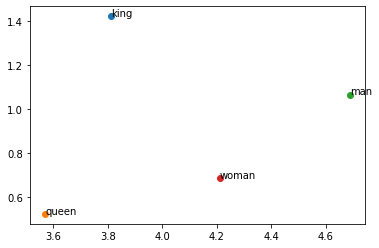

In [26]:
plot_embeddings(words=["king", "queen", "man", "woman"], embeddings=glove, pca_results=pca_results)

# Data

## load data

In [0]:
import pandas as pd
import re
import urllib
import numpy as np

In [0]:
DATA_FILE = 'news.csv'
INPUT_FEATURE = 'title'
OUTPUT_FEATURE = 'category'

In [0]:
url = "https://raw.githubusercontent.com/madewithml/basics/master/data/news.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(DATA_FILE, 'wb') as fp:
  fp.write(html)

In [30]:
# load_data
df = pd.read_csv(DATA_FILE, header=0)
X = df[INPUT_FEATURE].values
y = df[OUTPUT_FEATURE].values
df.head(10)

,title,category
0,Wall St. Bears Claw Back Into the Black (Reuters),Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business
5,"Stocks End Up, But Near Year Lows (Reuters)",Business
6,Money Funds Fell in Latest Week (AP),Business
7,Fed minutes show dissent over inflation (USATO...,Business
8,Safety Net (Forbes.com),Business
9,Wall St. Bears Claw Back Into the Black,Business


# Split Data

In [0]:
import collections
# 자료를 셀 때 사용하는 객체
from sklearn.model_selection import train_test_split

In [0]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15 # validation 데이터의 비중인듯
TEST_SIZE = 0.15
SHUFFLE = True

In [0]:
def train_val_test_split(X, y, val_size, test_size, shuffle):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, shuffle=shuffle)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, stratify=y_train, shuffle=shuffle)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X = X, y=y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)

In [35]:
class_counts = dict(collections.Counter(y))
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Sample point: {X_train[0]} -> {y_train[0]}")
print(f"Classes: {class_counts}")


X_train: (86700,), y_train: (86700,)
X_val: (15300,), y_val: (15300,)
X_test: (18000,), y_test: (18000,)
Sample point: Deep Impact Space Probe Aims to Slam Into Comet (Reuters) -> Sci/Tech
Classes: {'Business': 30000, 'Sci/Tech': 30000, 'Sports': 30000, 'World': 30000}


# Tokenizer

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [0]:
FILTERS = "!\"'#$%&()*+,-./:;<=>?@[\\]^_`{|}~"
LOWER = True
CHAR_LEVEL = False # Default 가 False 인데?

In [0]:
def decode(indices, tokenizer):
  return " ".join([tokenizer.index_word[index] for index in indices])

In [0]:
# Input vectorizer
X_tokenizer = Tokenizer(filters=FILTERS, lower=LOWER, char_level=CHAR_LEVEL, oov_token='<UNK>')
# oov => out-of-vocaburay : 없는 단어는 저걸로 처리


In [40]:
X_tokenizer.fit_on_texts(X_train)
vocab_size = len(X_tokenizer.word_index) + 1
print(f"# tokens: {vocab_size}")
print(X_tokenizer.word_index)

# tokens: 29795
{'<UNK>': 1, 'to': 2, 'in': 3, '39': 4, 'for': 5, 's': 6, 'on': 7, 'of': 8, 'ap': 9, 'the': 10, 'b': 11, 'gt': 12, 'lt': 13, 'a': 14, 'at': 15, 'reuters': 16, 'us': 17, 'with': 18, 'new': 19, 'as': 20, 'up': 21, 'and': 22, 'oil': 23, 'says': 24, 'over': 25, 'microsoft': 26, 'u': 27, 'iraq': 28, 'by': 29, 'is': 30, '1': 31, 'after': 32, 'from': 33, 'afp': 34, 'out': 35, 'no': 36, '2': 37, 'deal': 38, 'china': 39, 'stocks': 40, 'may': 41, 'profit': 42, 'be': 43, 'more': 44, 't': 45, 'win': 46, 'it': 47, 'update': 48, 'bush': 49, 'world': 50, 'not': 51, 'game': 52, 'talks': 53, 'back': 54, 'wins': 55, 'first': 56, 'off': 57, 'prices': 58, 'sales': 59, '3': 60, 'will': 61, 'report': 62, 'ibm': 63, 'open': 64, 'security': 65, 'down': 66, 'google': 67, 'eu': 68, 'into': 69, 'against': 70, 'two': 71, 'com': 72, 'japan': 73, 'gets': 74, 'top': 75, 'set': 76, 'un': 77, 'india': 78, 'record': 79, 'rise': 80, 'bid': 81, 'court': 82, 'killed': 83, 'its': 84, 'year': 85, 'takes': 86

In [41]:
original_text = X_train[0]
X_train = np.array(X_tokenizer.texts_to_sequences(X_train))
X_val = np.array(X_tokenizer.texts_to_sequences(X_val))
X_test = np.array(X_tokenizer.texts_to_sequences(X_test))
preprocessed_text = decode(X_train[0], X_tokenizer)
print(f"{original_text}\n\t=> {preprocessed_text}\n\t => {X_train[0]}")

Deep Impact Space Probe Aims to Slam Into Comet (Reuters)
	=> deep impact space probe aims to slam into comet reuters
	 => [2072, 1544, 92, 197, 563, 2, 2194, 69, 4804, 16]


In [42]:
X_train = np.array(X_tokenizer.texts_to_sequences(X_train))
X_train[0]

AttributeError: ignored

Label Encoder

In [0]:
from sklearn.preprocessing import LabelEncoder

In [44]:
y_tokenizer = LabelEncoder()
y_tokenizer = y_tokenizer.fit(y_train)
classes = list(y_tokenizer.classes_)
print(f"classes: {classes}")

classes: ['Business', 'Sci/Tech', 'Sports', 'World']


In [45]:
# 라벨을 토큰에 매칭
y_train = y_tokenizer.transform(y_train)
y_val = y_tokenizer.transform(y_val)
y_test = y_tokenizer.transform(y_test)
print(f"y_train[0]: {y_train[0]}")


y_train[0]: 1


In [46]:
# class weights
counts = np.bincount(y_train) # 숫자를 세는 메소드
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print(f"class counts: {counts}, \nclass weights: {class_weights}")

class counts: [21675 21675 21675 21675], 
class weights: {0: 4.61361014994233e-05, 1: 4.61361014994233e-05, 2: 4.61361014994233e-05, 3: 4.61361014994233e-05}


## Generators

In [0]:
import math
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence

In [0]:
BATCH_SIZE = 64
FILTER_SIZES = [2,3,4]

In [0]:
# make custom data loader\
class DataGenerator(Sequence):
  def __init__(self, X, y, batch_size, max_filter_size, shuffle=False):
    self.X = X
    self.y = y
    self.batch_size = batch_size
    self.max_filter_size = max_filter_size
    self.shuffle = shuffle
    self.on_epoch_end()
  
  def __len__(self):
    # of batches...
    return math.ceil(len(self.X)/self.batch_size)

  def __str__(self):
    return(f"<DataGenerator( "\
           f"batch_size = {self.batch_size}, "\
           f"batches={len(self)}, "\
           f"shuffle={self.shuffle})>")
    
  def __getitem__(self, index):
    # Generate batch data

    # Gather indices for this batch
    batch_indices = self.epoch_indices[index * self.batch_size:(index+1)*self.batch_size]

    # 배치 데이터 생성
    X, y = self.create_batch(batch_indices=batch_indices)
    
    return X, y

  def on_epoch_end(self):
    # 매 에포크 마다 indices 생성
    self.epoch_indices = np.arange(len(self.X))
    if self.shuffle:
      np.random.shuffle(self.epoch_indices)

  def create_batch(self, batch_indices):
    # 배치를 직접적으로..

    # batch_indices 를 마스크처럼 활용
    X = self.X[batch_indices]
    y = self.y[batch_indices]

    # 패딩
    max_seq_len = max(self.max_filter_size, max([len(x) for x in X]))
    # padding="post"로 데이터의 뒷 부분에 패딩 추가 
    X = pad_sequences(X, padding="post", maxlen=max_seq_len)

    return X, y

In [0]:
# 제너레이터
training_generator = DataGenerator(X=X_train, y=y_train, batch_size=BATCH_SIZE, max_filter_size=max(FILTER_SIZES), shuffle=SHUFFLE)
validation_generator = DataGenerator(X=X_val, y=y_val, batch_size=BATCH_SIZE, max_filter_size=max(FILTER_SIZES), shuffle=False)
testing_generator = DataGenerator(X=X_test, y=y_test, batch_size=BATCH_SIZE, max_filter_size=max(FILTER_SIZES), shuffle=False)


In [51]:
print(f"training_generator:{training_generator}")
print(f"validation_generator:{validation_generator}")
print(f"testing_generator:{testing_generator}")

training_generator:<DataGenerator( batch_size = 64, batches=1355, shuffle=True)>
validation_generator:<DataGenerator( batch_size = 64, batches=240, shuffle=False)>
testing_generator:<DataGenerator( batch_size = 64, batches=282, shuffle=False)>


In [52]:
# 사용해보기
print(f"num test batches: {len(testing_generator)}")
for i, batch in enumerate(testing_generator):
  if i >= 10: break
  print(f"batch{i} | x: {batch[0].shape}, y: {batch[1].shape}")

num test batches: 282
batch0 | x: (64, 15), y: (64,)
batch1 | x: (64, 12), y: (64,)
batch2 | x: (64, 16), y: (64,)
batch3 | x: (64, 17), y: (64,)
batch4 | x: (64, 20), y: (64,)
batch5 | x: (64, 19), y: (64,)
batch6 | x: (64, 17), y: (64,)
batch7 | x: (64, 18), y: (64,)
batch8 | x: (64, 13), y: (64,)
batch9 | x: (64, 18), y: (64,)


# Embeddings

In [0]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Input

In [0]:
x = Input(shape=(10)) # (batch_size, max_seq_len)

In [55]:
x


<tf.Tensor 'input_1:0' shape=(None, 10) dtype=float32>

In [0]:
# Embeddings
embedding = Embedding(input_dim=10, # vocab size
                      output_dim=100 # embedding size
                      )

In [57]:
embedding(x).shape

TensorShape([None, 10, 100])

# Modeling

# Model

In [0]:
from tensorflow.keras.layers import Concatenate, Conv1D, Dense, Dropout, Embedding, GlobalMaxPool1D, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [0]:
class CNN(Model):
  def __init__(self, vocab_size, embedding_dim, filter_sizes, num_filters, hidden_dim, dropout_p, num_classes, freeze_embeddings=False):
    super(CNN, self).__init__(name="cnn")

    # Embeddings
    self.embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, trainable=not freeze_embeddings)

    # Convolutional filters
    self.convs = []
    self.pools = []
    for filter_size in filter_sizes:
      conv = Conv1D(filters=num_filters, kernel_size = filter_size, padding='same', activation="relu")
      pool = GlobalMaxPool1D(data_format='channels_last')
      self.convs.append(conv)
      self.pools.append(pool)

    self.concat = Concatenate(axis=1)

    # FC layers
    self.fc1 = Dense(units=hidden_dim, activation='relu')
    self.dropout = Dropout(rate=dropout_p)
    self.fc2 = Dense(units=num_classes, activation='softmax')

  def call(self, x_in, training=False):
    # Embedding
    x_emb = self.embedding(x_in)

    # Convoultions
    convs = []
    for i in range(len(self.convs)):
      z = self.convs[i](x_emb)
      z = self.pools[i](z)
      convs.append(z)
    
    # Concatenate
    z_cat = self.concat(convs)

    # Fc
    z = self.fc1(z_cat)
    if training:
      # 드롭아웃은 훈련때만 적용
      z = self.dropout(z, training = training)
    y_pred = self.fc2(z)

    return y_pred

  def summary(self, input_shape):
    x_in = Input(shape=input_shape, name='X')
    summary = Model(inputs=x_in, outputs=self.call(x_in), name=self.name)
    return plot_model(summary, show_shapes=True)

## gloVe embeddings

In [0]:
def load_glove_embeddings(embeddings_file):
  embeddings = {}
  with open(embeddings_file, "r") as fp:
    for index, line in enumerate(fp):
      values = line.split()
      word = values[0]
      embedding = np.asarray(values[1:], dtype='float32')
      embeddings[word] = embedding
  return embeddings

In [0]:
def make_embeddings_matrix(embeddings, word_index, embedding_dim):
  embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
  for word, i in word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  return embedding_matrix

In [62]:
embedding_file = 'glove.6B.{0}d.txt'.format(EMBEDDING_DIM)
glove_embeddings = load_glove_embeddings(embeddings_file=embeddings_file)
embedding_matrix = make_embeddings_matrix(embeddings=glove_embeddings,
                                          word_index=X_tokenizer.word_index,
                                          embedding_dim=EMBEDDING_DIM)
print(f"<Embeddings(words={embedding_matrix.shape[0]}, dim={embedding_matrix.shape[1]})>")

<Embeddings(words=29795, dim=100)>


# Experiments

In [0]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
%load_ext tensorboard

In [0]:
EMBEDDING_DIM = 100
NUM_FILTERS = 50
HIDDEN_DIM = 100
DROPOUT_P = 0.1
LEARNING_RATE = 1e-3
EARLY_STOPPING_CRITERIA = 3
NUM_EPOCHS = 10

## GloVe embeddings(frozen)

In [0]:
FREEZE_EMBEDDINGS = True

In [0]:
# initialize model
glove_frozen_model = CNN(vocab_size, embedding_dim=EMBEDDING_DIM,
                         filter_sizes=FILTER_SIZES,
                         num_filters=NUM_FILTERS,
                         hidden_dim = HIDDEN_DIM,
                         dropout_p = DROPOUT_P,
                         num_classes=len(classes),
                         freeze_embeddings=FREEZE_EMBEDDINGS)

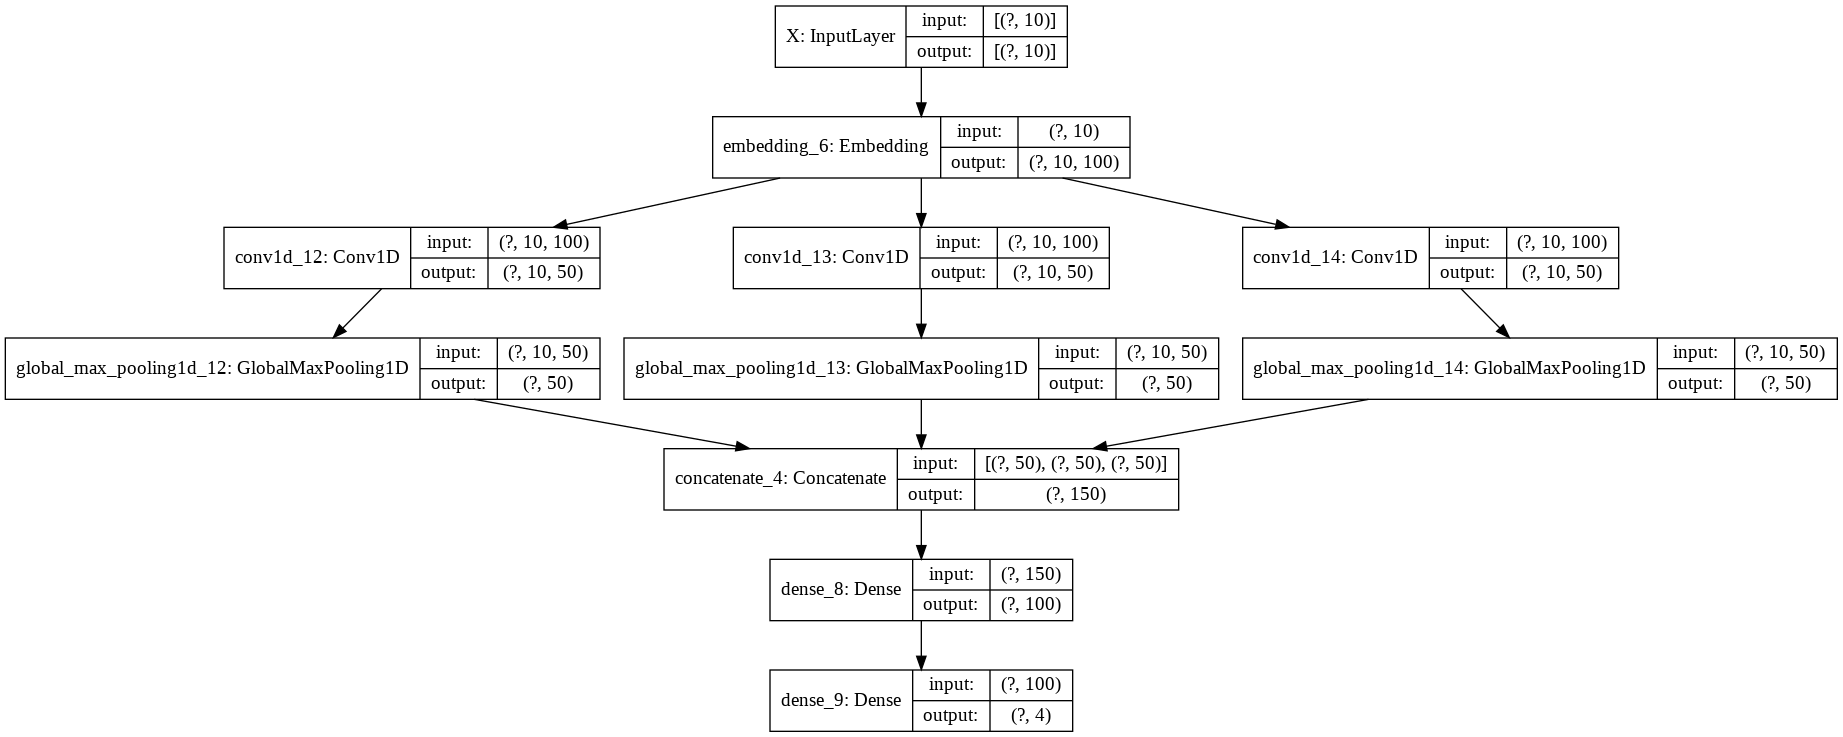

In [88]:
glove_frozen_model.summary(input_shape=(10, ))

In [0]:
# 임베딩
glove_frozen_model.layers[0].set_weights([embedding_matrix])

In [0]:
# Compile
glove_frozen_model.compile(optimizer=Adam(lr=LEARNING_RATE),
                           loss=SparseCategoricalCrossentropy(),
                           metrics=[SparseCategoricalAccuracy()])

In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_CRITERIA, verbose=1, mode='min'),
             ReduceLROnPlateau(patience=1, factor=0.1, verbose=0),
             TensorBoard(log_dir='tensorboard/glove_frozen', histogram_freq=1, update_freq='epoch')]
        

In [92]:
# 학습
training_history = glove_frozen_model.fit(x=training_generator,
                                          epochs=NUM_EPOCHS,
                                          validation_data=validation_generator,
                                          callbacks=callbacks,
                                          shuffle=False,
                                          class_weight=class_weights,
                                          verbose=1)

Epoch 1/10
1355/1355 [==============================] - 21s 16ms/step - loss: 2.2885e-05 - sparse_categorical_accuracy: 0.8206 - val_loss: 0.4132 - val_sparse_categorical_accuracy: 0.8482 - lr: 0.0010
Epoch 2/10
1355/1355 [==============================] - 20s 15ms/step - loss: 1.7199e-05 - sparse_categorical_accuracy: 0.8678 - val_loss: 0.3810 - val_sparse_categorical_accuracy: 0.8622 - lr: 0.0010
Epoch 3/10
1355/1355 [==============================] - 20s 15ms/step - loss: 1.5232e-05 - sparse_categorical_accuracy: 0.8835 - val_loss: 0.3774 - val_sparse_categorical_accuracy: 0.8625 - lr: 0.0010
Epoch 4/10
1355/1355 [==============================] - 20s 15ms/step - loss: 1.3740e-05 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8665 - lr: 0.0010
Epoch 5/10
1355/1355 [==============================] - 20s 15ms/step - loss: 1.2307e-05 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.3822 - val_sparse_categorical_accuracy: 0.8677 - lr: 0.

In [94]:
# Evaluation
testing_history = glove_frozen_model.evaluate(x=testing_generator, verbose=1)

282/282 [==============================] - 2s 6ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8692
